### In this notebook We will be performing the Exploratory Data Analysis along with Feature extraction if possible

#### Importing the necessary libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Loading the datasets from the previous phase

In [46]:
import os

dataset_train=pd.read_csv(os.path.join('..','data','preprocessing','train.csv'))
feature_stores_merged_df=pd.read_csv(os.path.join('..','data','preprocessing','features_stores_merged.csv'))

print(dataset_train.shape)
print(feature_stores_merged_df.shape)

(421570, 5)
(8190, 10)


In [47]:
dataset_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [48]:
dataset_train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [49]:
dataset_train['Date']=pd.to_datetime(dataset_train['Date'])

In [50]:
dataset_train.describe()

,Store,Dept,Date,Weekly_Sales
count,421570.000000,421570.000000,421570,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000
std,12.785297,30.492054,NaN,22711.183519


#### There are negative values for Weekly_Sales so we need to fix it

In [51]:
dataset_train['Weekly_Sales'] = dataset_train['Weekly_Sales'].clip(lower=0)

In [52]:
dataset_train.describe()

,Store,Dept,Date,Weekly_Sales
count,421570.000000,421570.000000,421570,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.467250
min,1.000000,1.000000,2010-02-05 00:00:00,0.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000
std,12.785297,30.492054,NaN,22711.032446


In [53]:
feature_stores_merged_df.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,TotalMarkDown,Type,Size
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False,0.0,A,151315
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True,0.0,A,151315
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False,0.0,A,151315
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False,0.0,A,151315
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False,0.0,A,151315


In [54]:
feature_stores_merged_df.describe()

,Store,Temperature,Fuel_Price,CPI,Unemployment,TotalMarkDown,Size
count,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
mean,23.000000,59.356198,3.405992,172.884206,7.743259,8881.703448,130287.600000
std,12.987966,18.678607,0.431337,39.882908,1.882941,19084.538888,63115.971429
min,1.000000,-7.290000,2.472000,126.064000,2.738818,-1692.480000,34875.000000
25%,12.000000,45.902500,3.041000,132.653774,6.565000,0.000000,70713.000000
50%,23.000000,60.710000,3.513000,182.855869,7.716000,0.000000,126512.000000
75%,34.000000,73.880000,3.743000,214.367504,8.549000,11819.642500,202307.000000
max,45.000000,101.950000,4.468000,229.090898,14.313000,783529.450000,219622.000000


#### Lets start with exploring the training dataset

#### First is the Store feature column

In [55]:
dataset_train['Store'].value_counts()

Store
13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: count, dtype: int64

In [56]:
len(dataset_train['Store'].unique())

45

In [57]:
def plot_freq_graph(column_name,df):
    all_stores_freq = df[column_name].value_counts()

    all_stores_freq.plot(kind='bar', figsize=(14,6), color='skyblue')
    plt.title(f'Frequency Distribution for {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Number of Records')
    plt.grid(axis='y')
    plt.show()

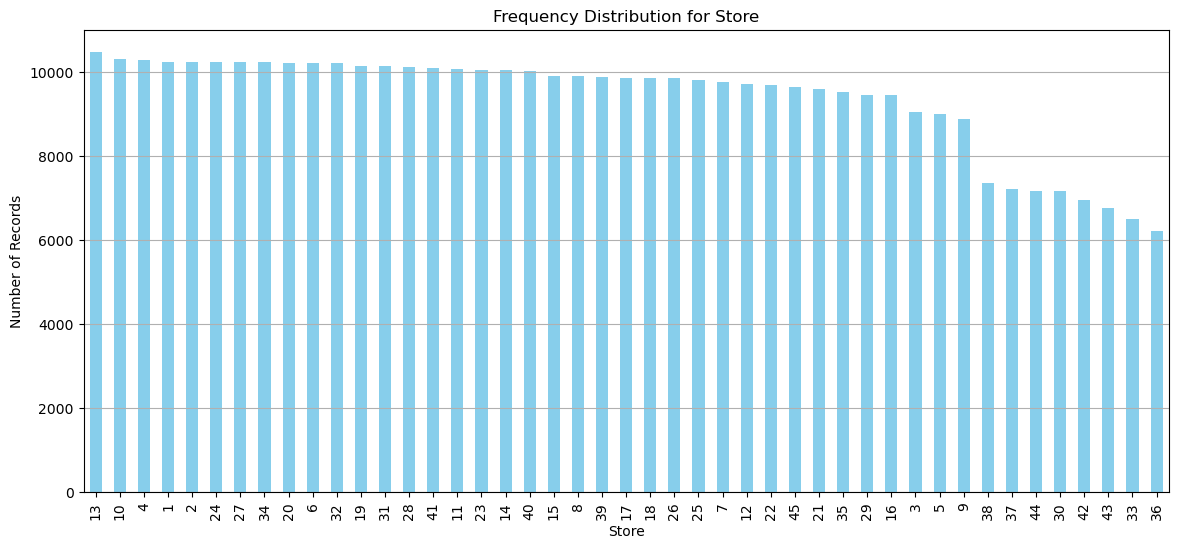

In [58]:
plot_freq_graph('Store',dataset_train)

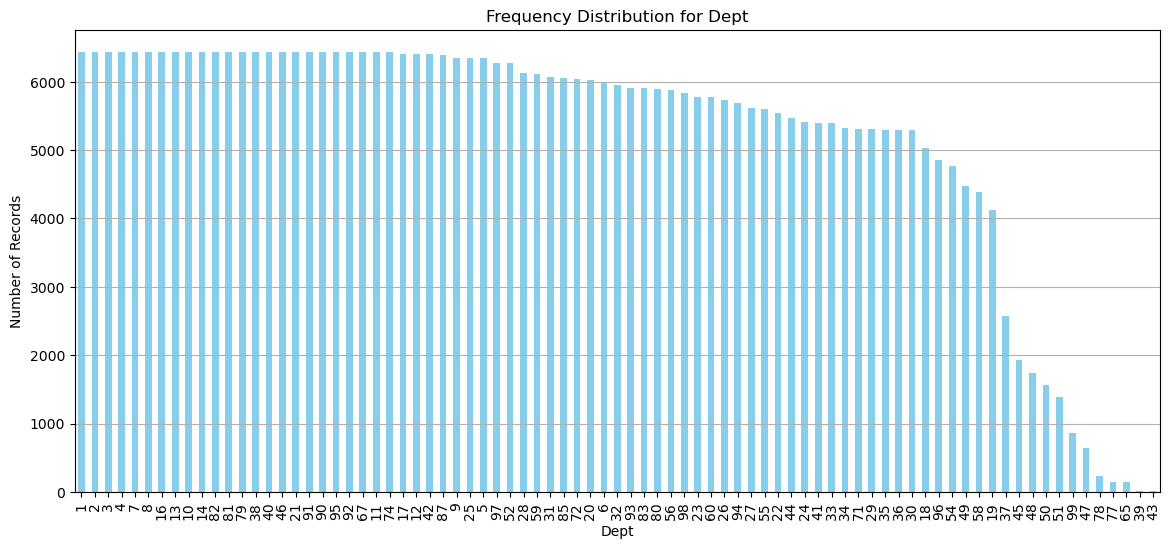

In [81]:
plot_freq_graph('Dept',dataset_train)

#### Time ranges for present for each of the stores

In [59]:
date_ranges = dataset_train.groupby('Store')['Date'].agg(['min', 'max']).sort_index()
print(date_ranges)

             min        max
Store                      
1     2010-02-05 2012-10-26
2     2010-02-05 2012-10-26
3     2010-02-05 2012-10-26
4     2010-02-05 2012-10-26
5     2010-02-05 2012-10-26
6     2010-02-05 2012-10-26
7     2010-02-05 2012-10-26
8     2010-02-05 2012-10-26
9     2010-02-05 2012-10-26
10    2010-02-05 2012-10-26
11    2010-02-05 2012-10-26
12    2010-02-05 2012-10-26
13    2010-02-05 2012-10-26
14    2010-02-05 2012-10-26
15    2010-02-05 2012-10-26
16    2010-02-05 2012-10-26
17    2010-02-05 2012-10-26
18    2010-02-05 2012-10-26
19    2010-02-05 2012-10-26
20    2010-02-05 2012-10-26
21    2010-02-05 2012-10-26
22    2010-02-05 2012-10-26
23    2010-02-05 2012-10-26
24    2010-02-05 2012-10-26
25    2010-02-05 2012-10-26
26    2010-02-05 2012-10-26
27    2010-02-05 2012-10-26
28    2010-02-05 2012-10-26
29    2010-02-05 2012-10-26
30    2010-02-05 2012-10-26
31    2010-02-05 2012-10-26
32    2010-02-05 2012-10-26
33    2010-02-05 2012-10-26
34    2010-02-05 201

#### All stores have same date range so no issues regarding time ranges. However we observed different frequencies of records for each of the stores so we need to handles that regardless of them having same time ranges

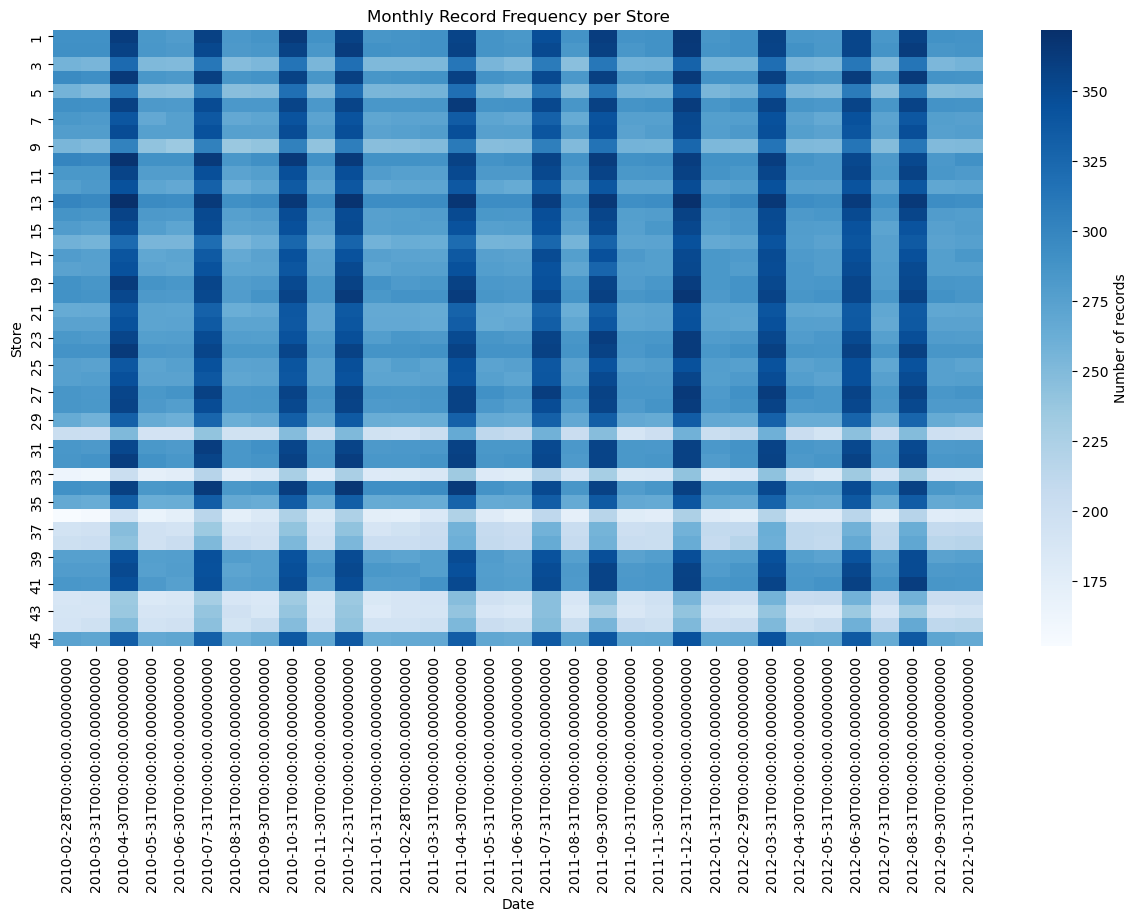

In [60]:
# Count records per store per month
dataset_train['Date'] = pd.to_datetime(dataset_train['Date'])

monthly_counts = dataset_train.groupby(
    ['Store', pd.Grouper(key='Date', freq='ME')]
)['Weekly_Sales'].count().reset_index()  # <-- no drop=True

# Pivot for heatmap
pivot_df = monthly_counts.pivot(index='Store', columns='Date', values='Weekly_Sales')

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.heatmap(pivot_df, cmap='Blues', cbar_kws={'label':'Number of records'})
plt.title('Monthly Record Frequency per Store')
plt.show()



#### Now we need to figure out why some stores are reporting more frequently while others are reporting less frequently

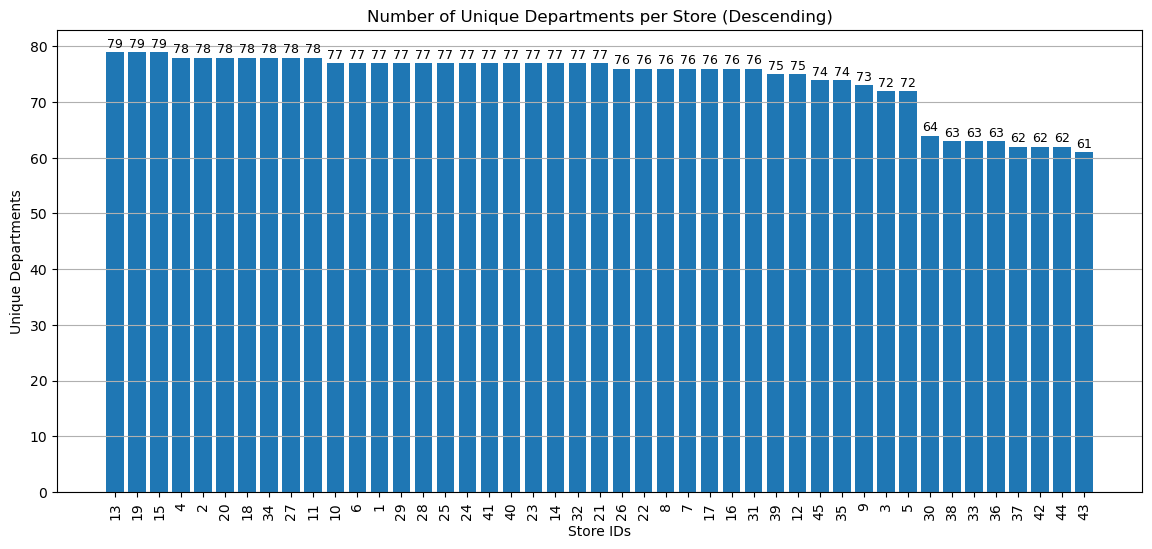

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Compute unique department count per store
dept_counts = dataset_train.groupby("Store")["Dept"].nunique().reset_index()

# Sort in descending order
dept_counts = dept_counts.sort_values(by="Dept", ascending=False)

plt.figure(figsize=(14,6))
bars = plt.bar(dept_counts["Store"].astype(str), dept_counts["Dept"])  # x-axis as store IDs

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # X position = center of the bar
        height + 0.3,                     # Y position = slightly above bar
        str(height),                      # Label = dept count
        ha='center', va='bottom', fontsize=9
    )

plt.title("Number of Unique Departments per Store (Descending)")
plt.xlabel("Store IDs")
plt.ylabel("Unique Departments")
plt.xticks(rotation=90)  # rotate to avoid overlap
plt.grid(axis='y')

plt.show()


#### Observation: The stores containing less number of departments where the same ones which were reporting less frequently lets observe what is the difference between store number 43 and others stores is terms of department

In [62]:
departments_43 = set(dataset_train[dataset_train['Store'] == 43]['Dept'])
departments_other_stores = set(dataset_train[dataset_train['Store'] != 43]['Dept'])
missing_in_43 = departments_other_stores - departments_43
print(missing_in_43)

{19, 29, 30, 34, 35, 36, 37, 39, 41, 43, 45, 47, 48, 50, 51, 54, 58, 65, 77, 78}


#### We will now populate the dataset with the remaining departments for each of the store

In [63]:
dataset_train['Date']=pd.to_datetime(dataset_train['Date'])

start_date = dataset_train['Date'].min()
end_date   = dataset_train['Date'].max()

# Create the complete weekly timeline
all_weeks = pd.date_range(start=start_date, end=end_date, freq='W-FRI')

# Create the full cartesian product: Store × Dept × Week
full_index = pd.MultiIndex.from_product(
    [dataset_train['Store'].unique(), dataset_train['Dept'].unique(), all_weeks],
    names=['Store', 'Dept', 'Date']
)

# Reindex your dataframe
dataset_train_full = (
    dataset_train.set_index(['Store', 'Dept', 'Date'])
      .reindex(full_index)
      .reset_index()
)

In [64]:
dataset_train_full.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


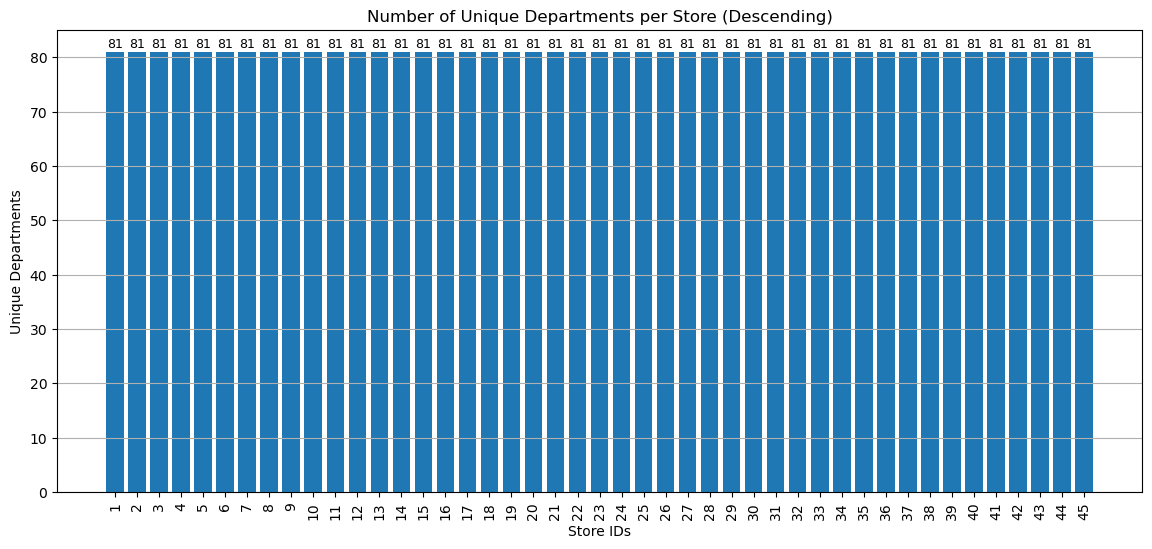

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

# Compute unique department count per store
dept_counts = dataset_train_full.groupby("Store")["Dept"].nunique().reset_index()

# Sort in descending order
dept_counts = dept_counts.sort_values(by="Dept", ascending=False)

plt.figure(figsize=(14,6))
bars = plt.bar(dept_counts["Store"].astype(str), dept_counts["Dept"])  # x-axis as store IDs

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # X position = center of the bar
        height + 0.3,                     # Y position = slightly above bar
        str(height),                      # Label = dept count
        ha='center', va='bottom', fontsize=9
    )

plt.title("Number of Unique Departments per Store (Descending)")
plt.xlabel("Store IDs")
plt.ylabel("Unique Departments")
plt.xticks(rotation=90)  # rotate to avoid overlap
plt.grid(axis='y')

plt.show()


In [66]:
dataset_train_full.shape

(521235, 5)

In [67]:
dataset_train_full.isna().sum()

Store               0
Dept                0
Date                0
Weekly_Sales    99665
IsHoliday       99665
dtype: int64

#### Now IsHoliday feature column along with weekly sales have null values. For IsHoliday we can impulte the boolean values from the specific store and specific departments time series values as that department in that specific store will contain the correct values for IsHoliday

In [68]:
subset_df=dataset_train_full[(dataset_train_full['Store']==13)&(dataset_train_full['Dept']==1)]
subset_df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [69]:
set(subset_df[subset_df['IsHoliday']==True]['Date'].dt.date)

{datetime.date(2010, 2, 12),
 datetime.date(2010, 9, 10),
 datetime.date(2010, 11, 26),
 datetime.date(2010, 12, 31),
 datetime.date(2011, 2, 11),
 datetime.date(2011, 9, 9),
 datetime.date(2011, 11, 25),
 datetime.date(2011, 12, 30),
 datetime.date(2012, 2, 10),
 datetime.date(2012, 9, 7)}

In [70]:
dataset_train_full['Date'] = pd.to_datetime(dataset_train_full['Date']).dt.date

# Create a set of holiday dates
holiday_dates = set(subset_df[subset_df['IsHoliday'] == True]['Date'].dt.date)

# Fill IsHoliday based on whether the date is in the holiday set
dataset_train_full['IsHoliday'] = dataset_train_full['Date'].apply(lambda x: True if x in holiday_dates else False)


In [71]:
dataset_train_full.isna().sum()

Store               0
Dept                0
Date                0
Weekly_Sales    99665
IsHoliday           0
dtype: int64

#### Now the IsHoliday column contains no null values we can now deal with Weekly Sales feature columns null values

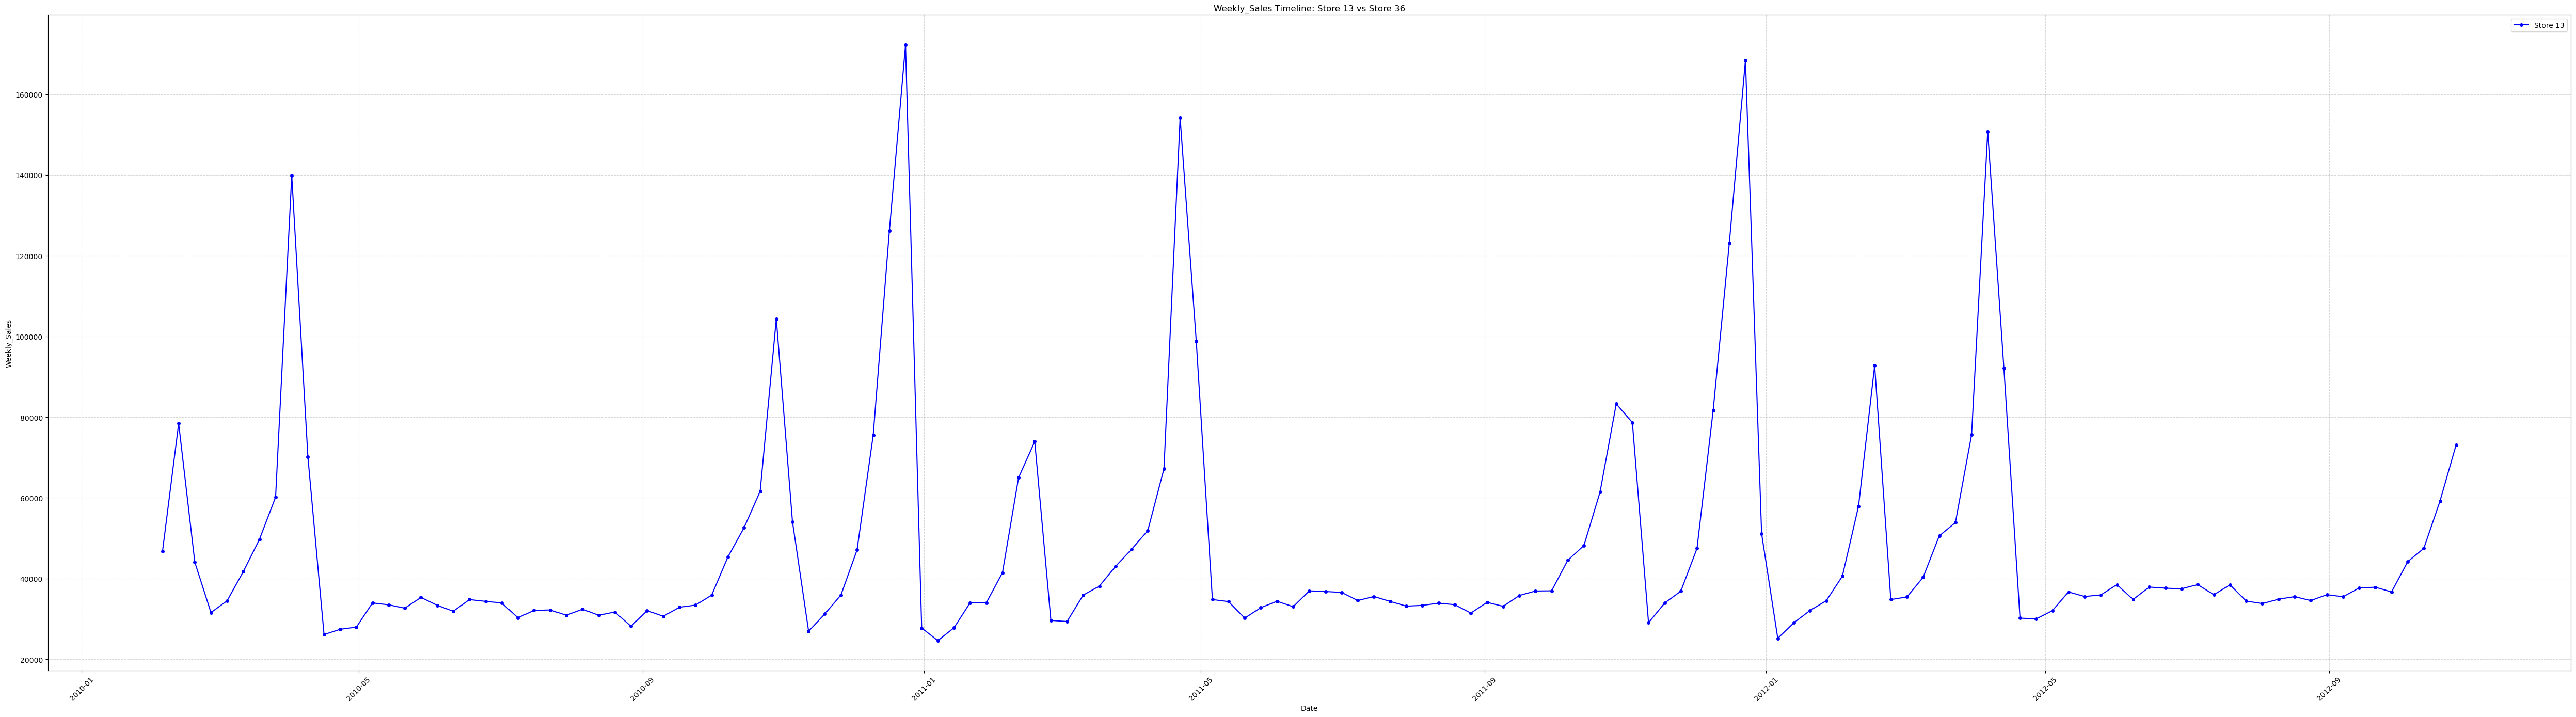

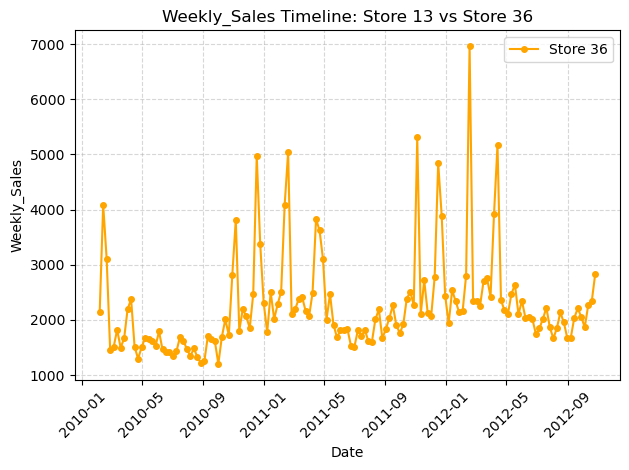

In [72]:
# Here the most frequently reporting store in number 13 and least frequently reporting one is 36
subset_13_store_df=dataset_train[(dataset_train['Store']==13)&(dataset_train['Dept']==1)].sort_values(by=['Date']).reset_index(drop=True)
subset_36_store_df=dataset_train[(dataset_train['Store']==36)&(dataset_train['Dept']==1)].sort_values(by=['Date']).reset_index(drop=True)

import matplotlib.pyplot as plt

# Make sure 'Date' is datetime
subset_13_store_df['Date'] = pd.to_datetime(subset_13_store_df['Date'])
subset_36_store_df['Date'] = pd.to_datetime(subset_36_store_df['Date'])

plt.figure(figsize=(50,14))

# Plot Store 13
plt.plot(subset_13_store_df['Date'], subset_13_store_df['Weekly_Sales'], 
         marker='o', markersize=4, linestyle='-', color='blue', label='Store 13')

plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.title('Weekly_Sales Timeline: Store 13 vs Store 36')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Store 36
plt.plot(subset_36_store_df['Date'], subset_36_store_df['Weekly_Sales'], 
         marker='o', markersize=4, linestyle='-', color='orange', label='Store 36')

plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.title('Weekly_Sales Timeline: Store 13 vs Store 36')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Lets check for the department feature column

In [73]:
sorted(dataset_train['Dept'].unique())

[np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(16),
 np.int64(17),
 np.int64(18),
 np.int64(19),
 np.int64(20),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(30),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(34),
 np.int64(35),
 np.int64(36),
 np.int64(37),
 np.int64(38),
 np.int64(39),
 np.int64(40),
 np.int64(41),
 np.int64(42),
 np.int64(43),
 np.int64(44),
 np.int64(45),
 np.int64(46),
 np.int64(47),
 np.int64(48),
 np.int64(49),
 np.int64(50),
 np.int64(51),
 np.int64(52),
 np.int64(54),
 np.int64(55),
 np.int64(56),
 np.int64(58),
 np.int64(59),
 np.int64(60),
 np.int64(65),
 np.int64(67),
 np.int64(71),
 np.int64(72),
 np.int64(74),
 np.int64(77),
 np.int64(78),
 np.int64(79),
 np.int64(80),
 np.int64(81),
 np.

#### There is irregular sequence of unique values present in the Dept feature column so it means there are some departments not present in some stores due to which reporting for those departments does not occur

In [74]:
len(dataset_train['Dept'].unique())

81

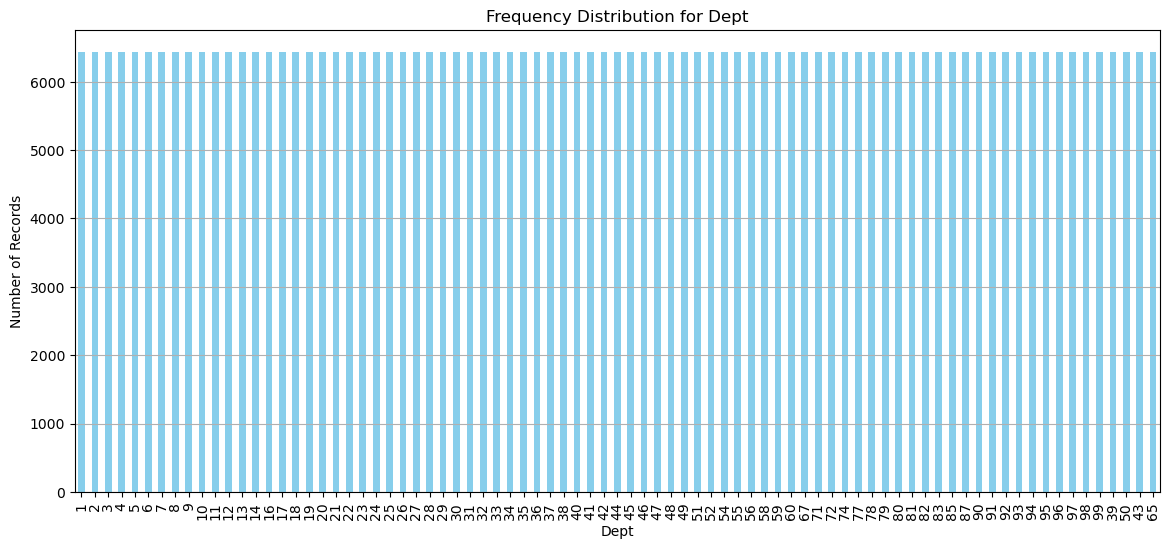

In [79]:
plot_freq_graph('Dept',dataset_train_full)

In [80]:
date_ranges = dataset_train_full.groupby('Dept')['Date'].agg(['min', 'max']).sort_index()
pd.set_option('display.max_rows', None)
print(date_ranges)

             min         max
Dept                        
1     2010-02-05  2012-10-26
2     2010-02-05  2012-10-26
3     2010-02-05  2012-10-26
4     2010-02-05  2012-10-26
5     2010-02-05  2012-10-26
6     2010-02-05  2012-10-26
7     2010-02-05  2012-10-26
8     2010-02-05  2012-10-26
9     2010-02-05  2012-10-26
10    2010-02-05  2012-10-26
11    2010-02-05  2012-10-26
12    2010-02-05  2012-10-26
13    2010-02-05  2012-10-26
14    2010-02-05  2012-10-26
16    2010-02-05  2012-10-26
17    2010-02-05  2012-10-26
18    2010-02-05  2012-10-26
19    2010-02-05  2012-10-26
20    2010-02-05  2012-10-26
21    2010-02-05  2012-10-26
22    2010-02-05  2012-10-26
23    2010-02-05  2012-10-26
24    2010-02-05  2012-10-26
25    2010-02-05  2012-10-26
26    2010-02-05  2012-10-26
27    2010-02-05  2012-10-26
28    2010-02-05  2012-10-26
29    2010-02-05  2012-10-26
30    2010-02-05  2012-10-26
31    2010-02-05  2012-10-26
32    2010-02-05  2012-10-26
33    2010-02-05  2012-10-26
34    2010-02-

#### Now as all the ranges are present in for all the departments in all the stores. We can go ahead with another process we would like to apply for reducing the data biases

#### We will first eliminate all the (store,dept) pair where the Weekly sales are null for all the weeks as we were the ones who created that combination for completing the dataset. In case this pair appears out in the test set, we will simply predict 0 for the weekly sales as we dont have any data related to that pair to train a model for prediction

#### So lets see which pairs of (store,dept) is having weekly sales to be null on the complete time period

In [82]:
dead_pairs = (
    dataset_train_full.groupby(['Store', 'Dept'])['Weekly_Sales']
      .apply(lambda x: x.isna().all())   # True if all NaN
      .reset_index()
)

# Create a set of (Store, Dept) tuples where all sales are NaN
dead_pairs_set = set(
    dead_pairs[dead_pairs['Weekly_Sales'] == True][['Store', 'Dept']]
    .apply(tuple, axis=1)
)

print(len(dead_pairs_set), "dead (Store, Dept) pairs found")
print(list(dead_pairs_set)[:10])  # peek at a few


314 dead (Store, Dept) pairs found
[(15, 39), (26, 39), (5, 65), (21, 37), (5, 83), (29, 50), (40, 50), (9, 99), (33, 29), (44, 29)]


#### Now lets drop these records with these (store,dept) pair

In [83]:
# Drop dead pairs from training data
dataset_train_full = dataset_train_full[
    ~dataset_train_full[['Store', 'Dept']].apply(tuple, axis=1).isin(dead_pairs_set)
].reset_index(drop=True)

print("After dropping:", dataset_train_full.shape)


After dropping: (476333, 5)


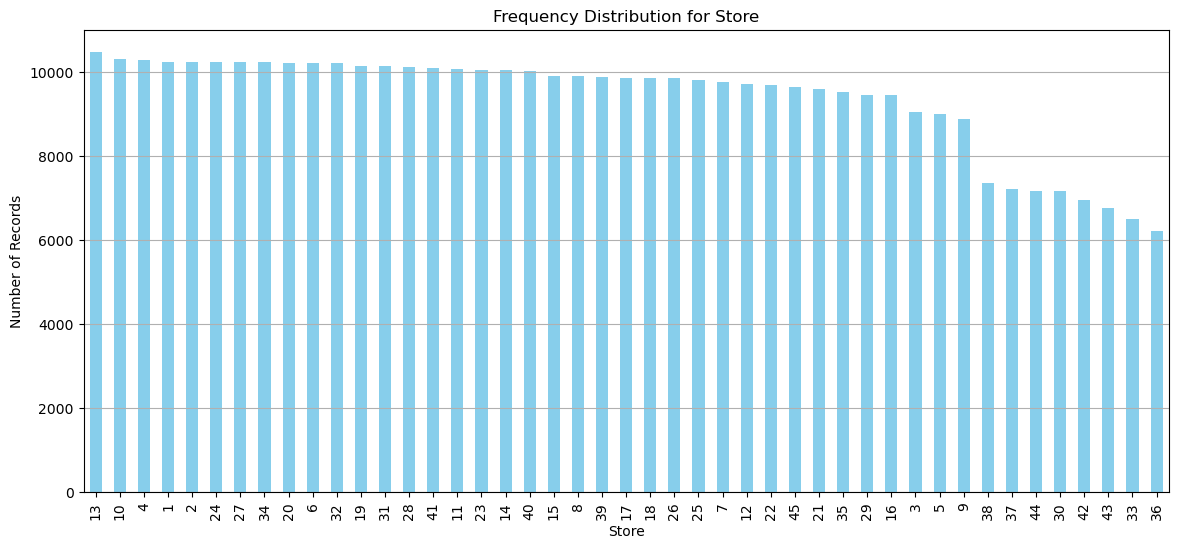

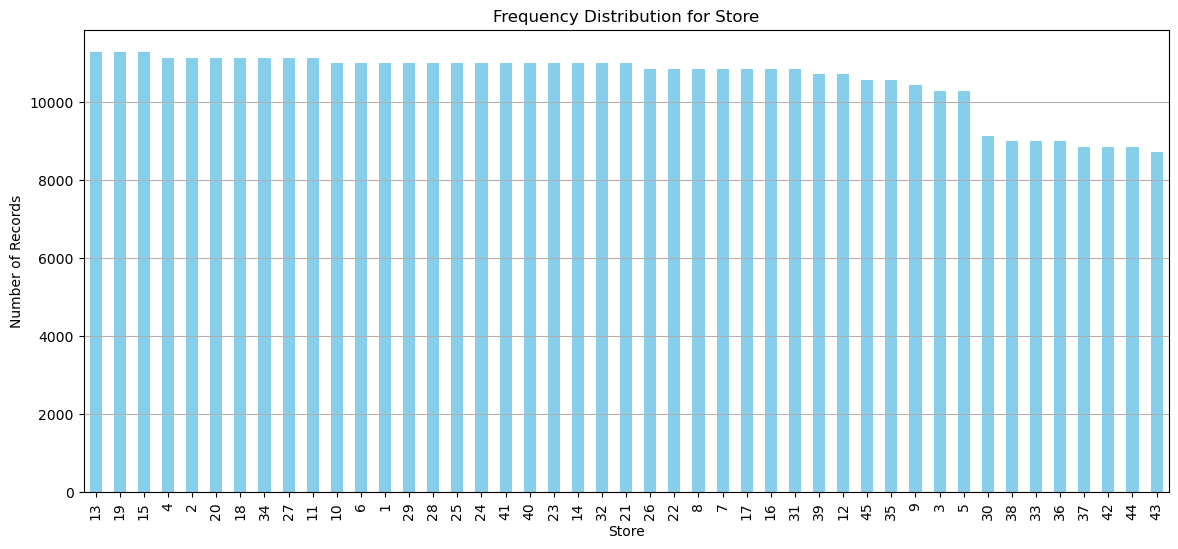

In [ ]:
plot_freq_graph('Store',dataset_train)
plot_freq_graph('Store',dataset_train_full)

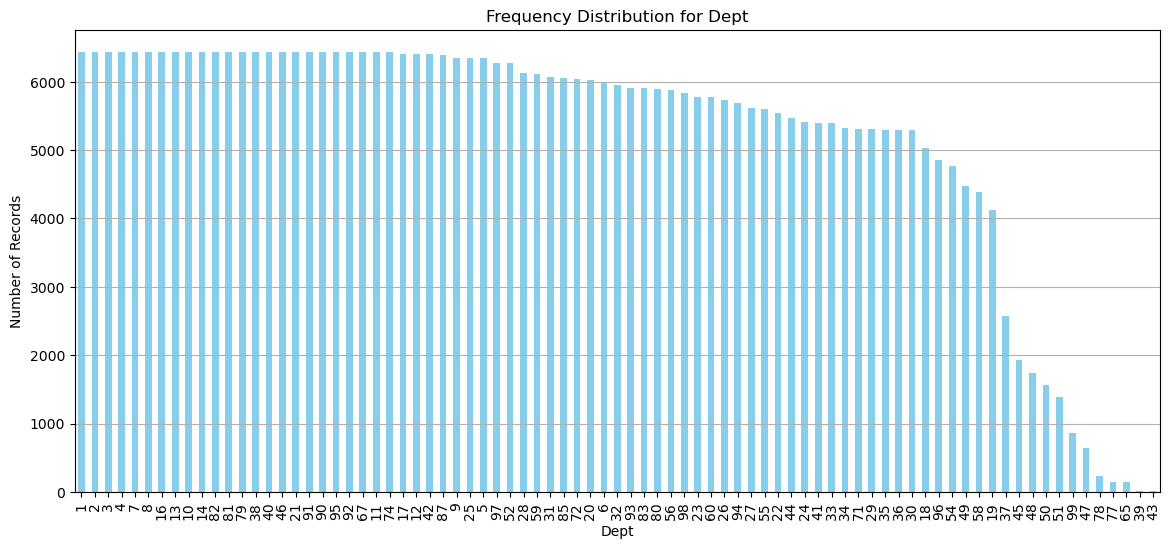

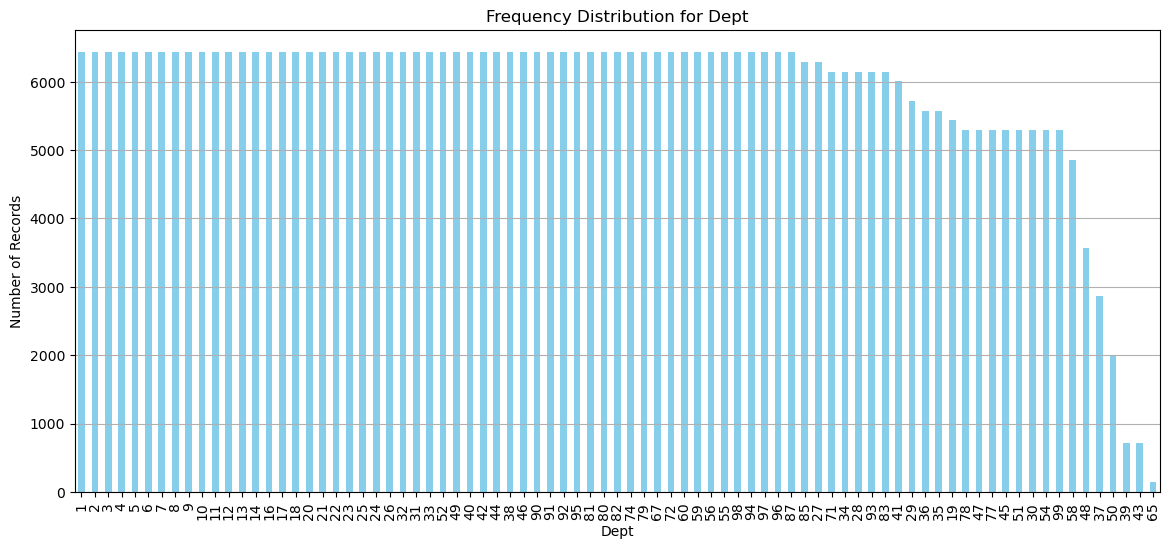

In [87]:
plot_freq_graph('Dept',dataset_train)
plot_freq_graph('Dept',dataset_train_full)

In [88]:
dataset_train_full.isna().sum()

Store               0
Dept                0
Date                0
Weekly_Sales    54763
IsHoliday           0
dtype: int64

In [90]:
# Suppose you want dept 1
dept_id = 1

# Filter rows for that department
dept_df = dataset_train_full[dataset_train_full['Dept'] == dept_id]

# Sort by Store first, then Date
dept_df_sorted = dept_df.sort_values(by=['Store', 'Date']).reset_index(drop=True)
print(dept_df_sorted['Store'].unique())
print(dept_df_sorted.head(20))  # peek at first 20 rows


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
    Store  Dept        Date  Weekly_Sales  IsHoliday
0       1     1  2010-02-05      24924.50      False
1       1     1  2010-02-12      46039.49       True
2       1     1  2010-02-19      41595.55      False
3       1     1  2010-02-26      19403.54      False
4       1     1  2010-03-05      21827.90      False
5       1     1  2010-03-12      21043.39      False
6       1     1  2010-03-19      22136.64      False
7       1     1  2010-03-26      26229.21      False
8       1     1  2010-04-02      57258.43      False
9       1     1  2010-04-09      42960.91      False
10      1     1  2010-04-16      17596.96      False
11      1     1  2010-04-23      16145.35      False
12      1     1  2010-04-30      16555.11      False
13      1     1  2010-05-07      17413.94      False
14      1     1  2010-05-14      18926.74      False
15      1     

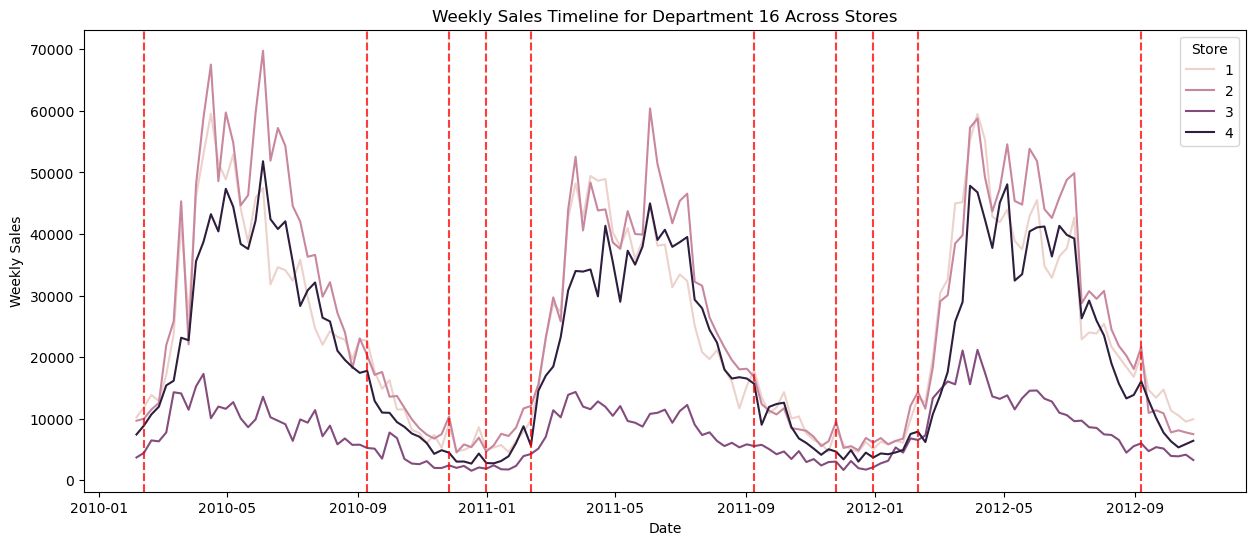

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

dept_id = sorted(dataset_train_full['Dept'].unique())

dept_df = dataset_train_full[dataset_train_full['Dept'] == dept_id]
dept_df_sorted = dept_df.sort_values(by=['Store', 'Date']).reset_index(drop=True)

stores_to_plot = [1, 2, 3, 4]

holidays = dept_df[dept_df['IsHoliday']==True]['Date']

dept_df = dataset_train_full[
    (dataset_train_full['Dept'] == dept_id) & 
    (dataset_train_full['Store'].isin(stores_to_plot))
].sort_values(by='Date')

plt.figure(figsize=(15,6))
sns.lineplot(data=dept_df, x='Date', y='Weekly_Sales', hue='Store', estimator=None)
for h in holidays:
    plt.axvline(h, color='red', linestyle='--', alpha=0.3)
plt.title(f"Weekly Sales Timeline for Department {dept_id} Across Stores")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend(title="Store")
plt.show()